## Analysis of the titanic dataset

In this work, we are doing the data analysis of titanic dataset. Our goal is to extract some insights from the
data in order to understand details about the catastrophe. Before doing anything, we need to import some relevants libraries you may used.

In [59]:
### Relevant librairies ###
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as snb
import warnings 
warnings.filterwarnings('ignore')

Let us use our common sense to read the data into an understandable format.

In [2]:
url = "https://raw.githubusercontent.com/rock-feller/Datasets_for_Education/main/data_01/titanic_data.csv"
df = pd.read_csv(url, sep="&")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Let us try to understand the data set. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From the info, we can see that the data has 12 columns and 891 entries. The types of varaibles are either 'int64' or 'float64'. Also only three variables " Age" , "Embarked" and "Cabin" have missing values. While ‘Cabin’ has huge amount null values, ‘Age’ has moderate amount of null values and "Embarked" has 2. So if we have to perform a model, we might have to drop the variable "Cabin".

## 1. How many passengers from the middle class embarked from Cherbourg Port? From Queenstown Port? From Southampton Port? For each of embarkation ports, what is the proportion that survived the sink.

In [4]:
df[df['Pclass'] ==2].shape


(184, 12)

In [5]:
### Number of passengers from class 2 embarked from Cherbourg Port ###
N1 = df[(df["Pclass"] == 2) & (df["Embarked"] =="C")]
print(N1.shape)
N1_survived = N1[df["Survived"]==1]
prop_survived_N1 = 100*N1_survived.shape[0]/N1.shape[0]
prop_survived_N1

(17, 12)


52.94117647058823

In [6]:
### Number of passengers from class 2 embarked from  Queenstown Port ###
N2 = df[(df["Pclass"] == 2) & (df["Embarked"] =="Q")]
print(N2.shape)
N2_survived = N2[df["Survived"]==1]
prop_survived_N2 = 100*N2_survived.shape[0]/N2.shape[0]
prop_survived_N2

(3, 12)


66.66666666666667

In [7]:
### Number of passengers from class 2 embarked from  Southampton Port ###
N3 = df[(df["Pclass"] == 2) & (df["Embarked"] =="S")]
print(N3.shape)
N3_survived = N3[df["Survived"]==1]
prop_survived_N3 = 100*N3_survived.shape[0]/N3.shape[0]
prop_survived_N3

(164, 12)


46.34146341463415

In [8]:
df['Pclass'].shape

(891,)

From this analysis, we find that out of 184 passengers from the middle class, those embarked from Cherbourg Port were 17 and 53\% survived the sink; 3 passengers embarked from Queenstown Port and 67\% survived and 164 embarked from Southampton Port with 46 \% survived the sink.

## 2. At that time, it was reported that not so many women boarded into the Titanic? What proportion did they represent within the lower class?

In [9]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [10]:
Nbr_women1 = df[ (df["Pclass"] == 3) & (df["Sex"] == "female")].shape[0]
Tot_Nbr1 = df[(df["Pclass"] == 3) & (df["Sex"])].shape[0]
prop_women1 = 100*Nbr_women1/Tot_Nbr1
print("At that time, women represented", round(prop_women1, 1),"% within the lower class" )

At that time, women represented 29.3 % within the lower class


## 3. Some of the passengers travelled abroad to see their family (including parents, siblings, children, spouse) and some others took the trip just for leisure. What proportion did the latter represent? How many of them came from Southampton?

In [11]:
Nbre_leisure = df[ (df["SibSp"] == 0) & (df["Parch"] == 0)].shape[0]
print(Nbre_leisure)
Tot_Nbr1 = 891
prop_leisure = 100*Nbre_leisure/Tot_Nbr1
print(round(prop_leisure, 1),"% of people took the trip just for leisure" )

537
60.3 % of people took the trip just for leisure


we can see that $60.3\%$ of people took titanic just for leisure, to have fun which means that they died while try to relax and enjoy.

In [12]:
## Number of people came from southampton just for leisure ##
df[ (df["SibSp"] == 0) & (df["Parch"] == 0)& (df["Embarked"] =="S")].shape[0]

393

Out of 537 who travelled for leisure, most of them (393 people) came from southampton. This could tell us that that area is where people like adventures, leisure very much. 

Let us read the second data set which contains some additional piece of information about the passengers recently discovered by the Southampton Archeological Services (SAS). The purpose is to further our analysis.

In [13]:
url1 "https://raw.githubusercontent.com/rock-feller/Datasets_for_Education/main/data_01/titanic_losgistics.csv"
df1 = pd.read_csv(url1)
df1

,country_origin,PassengerId,Boarding_date,status_diseases
0,Norway,884,1867-04-23,inf_pneumonia
1,French,765,1867-05-01,inf_measles
2,France,355,1867-04-03,inf_pneumonia
3,Spain,56,1867-03-24,rec_measles
4,UK,96,1867-04-15,inf_measles
...,...,...,...,...
886,uk,140,1867-04-22,inf_pneumonia
887,uk,829,1867-04-29,rec_pneumonia
888,Den_mark,27,1867-04-12,rec_flu
889,France,257,1867-04-01,inf_pneumonia


## 4. Looking at the columns, are they all tidy? If not, describe the process to tidy them.

* After looking at the columns carefully, we find the all are not in the tidy form. One of the assumption of tidy data is that each variable should form a column and then give one information. But we remark the last variable of the data (status_diseases) give two information. The first on the status of people with two outcomes : "inf" and "rec" and the second one on the type of disease they suffered.

* To tidy this data we firstly split the variable "status_diseases" into two variables: "status" and "diseases", we assign this operation to a variable called "var_split". After that we extract all the first element of that variable which is a series and we assign to our two variables "status" and "diseases". Then, we assign the parts to new dataframe columns and finally we drop the odd variable "status_diseases".

* Also, we can see that in the column "country_origin" there are some countries which are written in different ways like French and France. So we need to remplace them by using the function replace.

* Another thing we may do is to sort the values of "PassengerId" by ascending but it is not obliged.

The three following cells show how to do it by code.

In [14]:
###### Let us rearrange the variable status_diseases ####

df2 = df1  # let us make a copy 
# split status_diseases into two variables
var_split = df2['status_diseases'].str.split('_')
print(type(var_split))

# save each part to a separate variable
status = var_split.str.get(0)  # to extract all the first elements of the series
diseases = var_split.str.get(1) # to extract all the second elements

# assign the parts to new dataframe columns
df2['status'] = status
df2['diseases'] = diseases

# drop the initial variable
df2 = df2.drop("status_diseases", axis = 1)
df2

<class 'pandas.core.series.Series'>


,country_origin,PassengerId,Boarding_date,status,diseases
0,Norway,884,1867-04-23,inf,pneumonia
1,French,765,1867-05-01,inf,measles
2,France,355,1867-04-03,inf,pneumonia
3,Spain,56,1867-03-24,rec,measles
4,UK,96,1867-04-15,inf,measles
...,...,...,...,...,...
886,uk,140,1867-04-22,inf,pneumonia
887,uk,829,1867-04-29,rec,pneumonia
888,Den_mark,27,1867-04-12,rec,flu
889,France,257,1867-04-01,inf,pneumonia


We can remark that our data set include now variables "status" and "diseases". Now let us check if the variable "country_origin" is okay and tidy it if not.

In [15]:
df2.country_origin.unique()


array(['Norway', 'French', 'France', 'Spain', 'UK', 'uk', 'Romania',
       'Netherlands', 'Italy', 'United Kingdom', 'Poland', 'Denmark',
       'Portugal', 'Montenegro', 'Den_mark'], dtype=object)

We can see that the countries France, UK and Denmark appear it different way. So let us choose one name to call each of them.

In [16]:
df2.country_origin.replace("French", "France", inplace = True)
df2.country_origin.replace("UK", "United Kingdom", inplace = True)
df2.country_origin.replace("uk", "United Kingdom", inplace = True)
df2.country_origin.replace("Den_mark", "Denmark", inplace = True)
df2.country_origin.unique()

array(['Norway', 'France', 'Spain', 'United Kingdom', 'Romania',
       'Netherlands', 'Italy', 'Poland', 'Denmark', 'Portugal',
       'Montenegro'], dtype=object)

The problem is solved. We can sort the variable "PassengerId" now.

In [17]:
df2.sort_values(by="PassengerId", inplace = True)
df2

,country_origin,PassengerId,Boarding_date,status,diseases
455,Denmark,1,1867-03-29,rec,flu
364,Italy,2,1867-04-17,inf,pneumonia
28,Romania,3,1867-05-01,inf,pneumonia
49,Italy,4,1867-03-15,inf,pneumonia
52,Norway,5,1867-04-21,inf,pneumonia
...,...,...,...,...,...
680,United Kingdom,887,1867-04-20,inf,measles
503,Denmark,888,1867-03-25,rec,measles
389,United Kingdom,889,1867-05-02,rec,flu
64,United Kingdom,890,1867-04-22,rec,pneumonia


Now we are ready to go further.

## 5. Merge the two dataframes together. You may want to look carefully before you do the merging operation.

In [20]:
Merge_titanic = df.merge(df2, on = "PassengerId") # We merge on PassengerId because it appeears twice.
Merge_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,country_origin,Boarding_date,status,diseases
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Denmark,1867-03-29,rec,flu
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Italy,1867-04-17,inf,pneumonia
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Romania,1867-05-01,inf,pneumonia
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Italy,1867-03-15,inf,pneumonia
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Norway,1867-04-21,inf,pneumonia


In [21]:
Merge_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    object 
 5   Age             714 non-null    float64
 6   SibSp           891 non-null    int64  
 7   Parch           891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Cabin           204 non-null    object 
 11  Embarked        889 non-null    object 
 12  country_origin  891 non-null    object 
 13  Boarding_date   891 non-null    object 
 14  status          891 non-null    object 
 15  diseases        891 non-null    object 
dtypes: float64(2), int64(5), object(9)
memory usage: 118.3+ KB


After merging, we have 16 variables with 891 observations. We still have three variables with missing values.

## 6. On weekends, It was speculated that on average ticket fare were more expensive than on weekdays. Let us check if what was a case.

To do so, we need to transform first the variable "Boarding_date" into datetime. After that we will find the corresponding days.

In [26]:
### datetime###
Merge_titanic["Boarding_date"] = Merge_titanic["Boarding_date"].apply(pd.to_datetime)

In [25]:
### Corresponding days ###
Merge_titanic["Days"] = [x.day_name() for x in Merge_titanic["Boarding_date"]]
Merge_titanic["Days"].unique() 

array(['Friday', 'Wednesday', 'Sunday', 'Saturday', 'Thursday', 'Tuesday',
       'Monday'], dtype=object)

By this, we can see the different days, the weekends are "Saturday" and "Sunday" and the weekydays here are "Wednesday", "Thursday" and "Friday".

In [41]:
### Mean of ticket fare on weekends ###
Merge_titanic.loc[(Merge_titanic["Days"]== "Saturday") 
                  | (Merge_titanic["Days"]== "Sunday"), ["Fare"]].mean()

Fare    30.351441
dtype: float64

In [46]:
### Mean of ticket fare on weekdays ###
Merge_titanic.loc[(Merge_titanic["Days"]== "Monday")|(Merge_titanic["Days"]== "Tuesday")
                  |(Merge_titanic["Days"]== "Wednesday") | 
                  (Merge_titanic["Days"]== "Thursday")| (Merge_titanic["Days"]== "Friday"), ["Fare"]].mean()

Fare    32.875624
dtype: float64

We can see that on weekends, the average ticket fare is approximately **30.4 British pound** which is less than **32.87 British pound** on weekdays. So it was more expensive on weekdays than on weekends. We therefore say that the speculation of people on the ticket fare was not the case. But it true that people would expected that the ticket fare be more expensive on weekends since they are resting days. 

## 7. People also boarded on the Titanic with infectuous diseases. How many of them were reported infected at the time they embarked on the boat? What is the proportion of infected people that came from the upper class?

In [48]:
yu = Merge_titanic.loc[Merge_titanic["status"]== "inf", ["Pclass"]]
yu.shape

Pclass    451
dtype: int64

We can see that **451 out of 891** were reported infected at the time they embarked on the boat. Now let us find the proportion of people that came from the upper class.

In [53]:
yu.value_counts(subset="Pclass", normalize=True)
    

Pclass
3    0.578714
1    0.226164
2    0.195122
dtype: float64

$22.6\%$ of people who were reported infected came from the upper class.

## 8. Let us display the proportion of infected passengers per disease and the number of recovered passengers per gender. 

Let us start by visualizing the proportion of diseases.

In [65]:
# Get status and diseases and assignm to the new series #
Diseases = Merge_titanic[["status", "diseases"]]

inf_d = pd.DataFrame(Diseases.value_counts(subset = ["status", "diseases"]), columns = ["count"])
inf_d.reset_index(inplace = True)

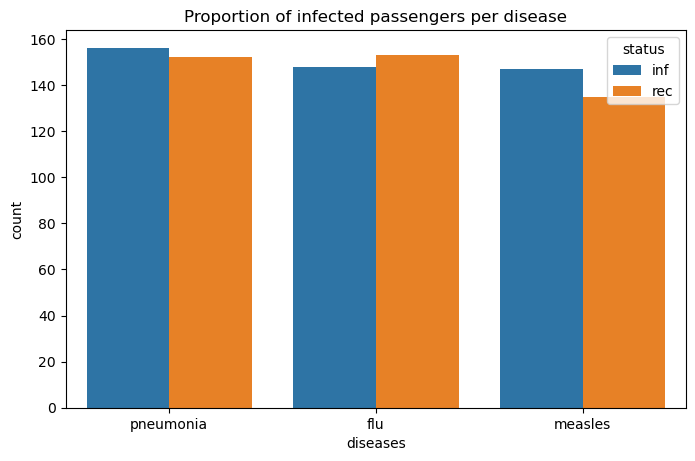

In [67]:
plt.figure(dpi = 100, figsize = (8,5))
snb.barplot(x = "diseases", y = "count", hue = "status", saturation = 0.8,  data = inf_d)
plt.title("Proportion of infected passengers per disease")
plt.show()

From the barplot above, we can see than "pneumonia" is the disease that people were more infected. "flu" and "measles" have approximately the same proportion of infected people.

In [69]:
# Get status and diseases and assignm to the new series #
Gender = Merge_titanic[["status", "Sex"]]

inf_d = pd.DataFrame(Gender.value_counts(subset = ["status", "Sex"]), columns = ["count"])
inf_d.reset_index(inplace = True)

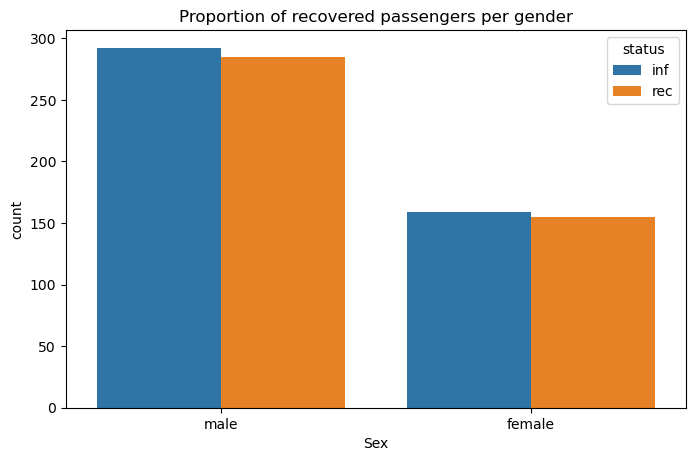

In [70]:
plt.figure(dpi = 100, figsize = (8,5))
snb.barplot(x = "Sex", y = "count", hue = "status", saturation = 0.8,  data = inf_d)
plt.title("Proportion of recovered passengers per gender")
plt.show()

We can observe the proportion of male who recovered is higher than the one of female. This may be because of the fact than men were the most infected.

## 10. Among the ones that survived, which gender had an average higher motricity index?

In [ ]:
Merge_titanic.loc[(Merge_titanic["Survived"]==1), ["Sex", "motricity_index"]].mean()